In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("../../data/processed/norookies.csv")

In [3]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

In [4]:
df

,Unnamed: 0.1.1,age,draft_pos,attempts,yards_run,tds_run,longgain_run,yardsperatt,yardspergame_run,Percenthit (%),...,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
0,0,26,182,75,389,5,75,5.2,77.8,1.100909,...,2,12,30,5.8,3.7,29.0,2,5.0,3.0,1.0
1,4,35,7,80,314,2,27,3.9,52.3,0.529768,...,0,3,18,4.9,1.0,7.1,0,19.0,22.0,18.0
2,5,34,7,211,898,5,32,4.3,59.9,0.945802,...,0,7,22,6.2,1.1,9.5,3,18.0,15.0,17.0
3,6,33,7,251,1042,7,90,4.2,65.1,0.355530,...,1,9,52,8.0,1.3,13.0,3,26.0,23.0,28.0
4,8,31,7,37,72,0,13,1.9,24.0,7.728473,...,0,0,7,1.3,1.0,2.7,1,30.0,32.0,26.0
5,9,30,7,327,1485,11,80,4.5,92.8,10.748185,...,0,9,49,6.2,1.9,13.9,7,10.0,4.0,12.0
6,10,29,7,21,75,0,17,3.6,75.0,9.268023,...,0,1,9,6.0,2.0,18.0,0,13.0,15.0,2.0
7,11,28,7,279,1266,10,78,4.5,90.4,11.300813,...,1,11,22,4.3,2.1,12.2,5,10.0,2.0,20.0
8,12,27,7,348,2097,12,82,6.0,131.1,10.534826,...,1,11,20,4.3,2.5,13.6,4,10.0,1.0,29.0
9,13,26,7,208,970,12,54,4.7,80.8,10.587500,...,1,5,22,5.8,1.5,11.6,1,18.0,4.0,28.0


In [5]:
df.dtypes

Unnamed: 0.1.1                int64
age                           int64
draft_pos                     int64
attempts                      int64
yards_run                     int64
tds_run                       int64
longgain_run                  int64
yardsperatt                 float64
yardspergame_run            float64
Percenthit (%)              float64
g                             int64
gs                            int64
tgt                           int64
rec                           int64
yards_rec                     int64
yardsperrec                 float64
tds_rec                       int64
firstdowns                    int64
longgain_rec                  int64
yardspertarget              float64
recpergame                  float64
yardspergame_rec            float64
fumbles                       int64
team_adjusted_line_yards    float64
team_running_back_yards     float64
team_stuffed_rate           float64
dtype: object

In [6]:
len(df.dtypes)

26

splitting & Scaling

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [10]:
len(X_test[1])

25

In [11]:

X_train.shape
model = Sequential()

model.add(Dense(24, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")
model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=200)

Train on 207 samples, validate on 90 samples
Epoch 1/200
207/207 [==============================] - 0s 1ms/step - loss: 12.6333 - val_loss: 12.5045
Epoch 2/200
207/207 [==============================] - 0s 187us/step - loss: 12.3045 - val_loss: 12.2219
Epoch 3/200
207/207 [==============================] - 0s 168us/step - loss: 12.0674 - val_loss: 12.0446
Epoch 4/200
207/207 [==============================] - 0s 127us/step - loss: 11.9159 - val_loss: 11.9178
Epoch 5/200
207/207 [==============================] - 0s 156us/step - loss: 11.8134 - val_loss: 11.8452
Epoch 6/200
207/207 [==============================] - 0s 207us/step - loss: 11.7641 - val_loss: 11.7973
Epoch 7/200
207/207 [==============================] - 0s 128us/step - loss: 11.7256 - val_loss: 11.7588
Epoch 8/200
207/207 [==============================] - 0s 164us/step - loss: 11.6883 - val_loss: 11.7225
Epoch 9/200
207/207 [==============================] - 0s 143us/step - loss: 11.6516 - val_loss: 11.6867
Epoch 10/200

207/207 [==============================] - 0s 144us/step - loss: 7.3537 - val_loss: 7.6496
Epoch 79/200
207/207 [==============================] - 0s 133us/step - loss: 7.2929 - val_loss: 7.6001
Epoch 80/200
207/207 [==============================] - 0s 137us/step - loss: 7.2383 - val_loss: 7.5527
Epoch 81/200
207/207 [==============================] - 0s 131us/step - loss: 7.1792 - val_loss: 7.5034
Epoch 82/200
207/207 [==============================] - 0s 108us/step - loss: 7.1215 - val_loss: 7.4500
Epoch 83/200
207/207 [==============================] - 0s 127us/step - loss: 7.0644 - val_loss: 7.4009
Epoch 84/200
207/207 [==============================] - 0s 136us/step - loss: 7.0131 - val_loss: 7.3440
Epoch 85/200
207/207 [==============================] - 0s 86us/step - loss: 6.9559 - val_loss: 7.2947
Epoch 86/200
207/207 [==============================] - 0s 131us/step - loss: 6.8976 - val_loss: 7.2544
Epoch 87/200
207/207 [==============================] - 0s 111us/step - loss: 

207/207 [==============================] - 0s 129us/step - loss: 2.7549 - val_loss: 3.6607
Epoch 157/200
207/207 [==============================] - 0s 139us/step - loss: 2.7296 - val_loss: 3.6930
Epoch 158/200
207/207 [==============================] - 0s 96us/step - loss: 2.7485 - val_loss: 3.6979
Epoch 159/200
207/207 [==============================] - 0s 130us/step - loss: 2.7227 - val_loss: 3.6785
Epoch 160/200
207/207 [==============================] - 0s 103us/step - loss: 2.7084 - val_loss: 3.6947
Epoch 161/200
207/207 [==============================] - 0s 109us/step - loss: 2.6991 - val_loss: 3.6949
Epoch 162/200
207/207 [==============================] - 0s 113us/step - loss: 2.7087 - val_loss: 3.6979
Epoch 163/200
207/207 [==============================] - 0s 136us/step - loss: 2.6845 - val_loss: 3.6802
Epoch 164/200
207/207 [==============================] - 0s 126us/step - loss: 2.6703 - val_loss: 3.6855
Epoch 165/200
207/207 [==============================] - 0s 128us/step

MSE:  3.827412426446154
RMSE:  1.956377373219736
MAE:  1.4612227869106509
ESV:  0.3371118038296572


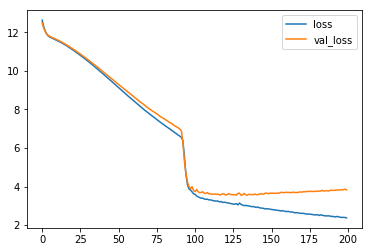

In [12]:
losses = pd.DataFrame(model.history.history)
losses.plot()

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

In [13]:
#model.save('./savedmodels/57dnn')

In [14]:
# loaded_model = tf.keras.models.load_model('./savedmodels/57dnn/')
# predictions = loaded_model.predict(X_test)
# print("MSE: ",mean_squared_error(y_test,predictions) )
# print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
# print("MAE: ",mean_absolute_error(y_test,predictions) )
# print("ESV: ", explained_variance_score(y_test, predictions))

In [15]:
for i in range(10):
    
    X_train.shape
    model = Sequential()

    model.add(Dense(24, activation="relu"))
    model.add(Dense(4, activation="relu"))
    model.add(Dense(4, activation="relu"))
    model.add(Dense(1))

    model.compile(optimizer="adam", loss="mse")
    model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=200)
    
    predictions = model.predict(X_test)
    print('\n'+'\n'+"ESV: " + str(explained_variance_score(y_test,predictions))+ '\n'+'\n'+'\n')
    if(explained_variance_score(y_test,predictions) > .58):
        winsound.Beep(512, 375)
        break

winsound.Beep(512, 375)

Train on 207 samples, validate on 90 samples
Epoch 1/200
207/207 [==============================] - 0s 1ms/step - loss: 10.7555 - val_loss: 10.3040
Epoch 2/200
207/207 [==============================] - 0s 159us/step - loss: 9.9433 - val_loss: 9.6097
Epoch 3/200
207/207 [==============================] - 0s 159us/step - loss: 9.1838 - val_loss: 8.9192
Epoch 4/200
207/207 [==============================] - 0s 184us/step - loss: 8.4557 - val_loss: 8.2412
Epoch 5/200
207/207 [==============================] - 0s 126us/step - loss: 7.7175 - val_loss: 7.5765
Epoch 6/200
207/207 [==============================] - 0s 171us/step - loss: 7.0316 - val_loss: 6.9420
Epoch 7/200
207/207 [==============================] - 0s 152us/step - loss: 6.3948 - val_loss: 6.3595
Epoch 8/200
207/207 [==============================] - 0s 140us/step - loss: 5.8114 - val_loss: 5.8467
Epoch 9/200
207/207 [==============================] - 0s 146us/step - loss: 5.3321 - val_loss: 5.4246
Epoch 10/200
207/207 [======

207/207 [==============================] - 0s 101us/step - loss: 3.3761 - val_loss: 3.7438
Epoch 80/200
207/207 [==============================] - 0s 131us/step - loss: 3.3670 - val_loss: 3.7502
Epoch 81/200
207/207 [==============================] - 0s 112us/step - loss: 3.3722 - val_loss: 3.7340
Epoch 82/200
207/207 [==============================] - 0s 118us/step - loss: 3.3495 - val_loss: 3.7568
Epoch 83/200
207/207 [==============================] - 0s 95us/step - loss: 3.3488 - val_loss: 3.7589
Epoch 84/200
207/207 [==============================] - 0s 117us/step - loss: 3.3441 - val_loss: 3.7636
Epoch 85/200
207/207 [==============================] - 0s 101us/step - loss: 3.3382 - val_loss: 3.7522
Epoch 86/200
207/207 [==============================] - 0s 91us/step - loss: 3.3354 - val_loss: 3.7257
Epoch 87/200
207/207 [==============================] - 0s 109us/step - loss: 3.3297 - val_loss: 3.7424
Epoch 88/200
207/207 [==============================] - 0s 113us/step - loss: 3

207/207 [==============================] - 0s 125us/step - loss: 2.8535 - val_loss: 3.6812
Epoch 158/200
207/207 [==============================] - 0s 136us/step - loss: 2.8562 - val_loss: 3.6775
Epoch 159/200
207/207 [==============================] - 0s 101us/step - loss: 2.8326 - val_loss: 3.6801
Epoch 160/200
207/207 [==============================] - 0s 121us/step - loss: 2.8390 - val_loss: 3.6859
Epoch 161/200
207/207 [==============================] - 0s 129us/step - loss: 2.8160 - val_loss: 3.6727
Epoch 162/200
207/207 [==============================] - 0s 137us/step - loss: 2.8137 - val_loss: 3.6679
Epoch 163/200
207/207 [==============================] - 0s 124us/step - loss: 2.8022 - val_loss: 3.6648
Epoch 164/200
207/207 [==============================] - 0s 90us/step - loss: 2.7922 - val_loss: 3.6711
Epoch 165/200
207/207 [==============================] - 0s 98us/step - loss: 2.7873 - val_loss: 3.6875
Epoch 166/200
207/207 [==============================] - 0s 134us/step 

207/207 [==============================] - 0s 64us/step - loss: 3.7586 - val_loss: 4.2513
Epoch 36/200
207/207 [==============================] - 0s 121us/step - loss: 3.7132 - val_loss: 4.1656
Epoch 37/200
207/207 [==============================] - 0s 107us/step - loss: 3.6861 - val_loss: 4.1646
Epoch 38/200
207/207 [==============================] - 0s 117us/step - loss: 3.6578 - val_loss: 4.1489
Epoch 39/200
207/207 [==============================] - 0s 128us/step - loss: 3.6195 - val_loss: 4.1225
Epoch 40/200
207/207 [==============================] - 0s 117us/step - loss: 3.5968 - val_loss: 4.1168
Epoch 41/200
207/207 [==============================] - 0s 100us/step - loss: 3.5684 - val_loss: 4.0780
Epoch 42/200
207/207 [==============================] - 0s 103us/step - loss: 3.5503 - val_loss: 4.0636
Epoch 43/200
207/207 [==============================] - 0s 98us/step - loss: 3.5348 - val_loss: 4.0174
Epoch 44/200
207/207 [==============================] - 0s 88us/step - loss: 3.

Epoch 114/200
207/207 [==============================] - 0s 132us/step - loss: 2.8901 - val_loss: 3.8610
Epoch 115/200
207/207 [==============================] - 0s 106us/step - loss: 2.8784 - val_loss: 3.8899
Epoch 116/200
207/207 [==============================] - 0s 115us/step - loss: 2.8987 - val_loss: 3.9033
Epoch 117/200
207/207 [==============================] - 0s 99us/step - loss: 2.8647 - val_loss: 3.8680
Epoch 118/200
207/207 [==============================] - 0s 98us/step - loss: 2.8688 - val_loss: 3.8691
Epoch 119/200
207/207 [==============================] - 0s 100us/step - loss: 2.8483 - val_loss: 3.9233
Epoch 120/200
207/207 [==============================] - 0s 123us/step - loss: 2.8674 - val_loss: 3.8972
Epoch 121/200
207/207 [==============================] - 0s 93us/step - loss: 2.8328 - val_loss: 3.9536
Epoch 122/200
207/207 [==============================] - 0s 115us/step - loss: 2.8215 - val_loss: 3.8896
Epoch 123/200
207/207 [==============================] - 0

207/207 [==============================] - 0s 113us/step - loss: 2.2498 - val_loss: 4.1026
Epoch 193/200
207/207 [==============================] - 0s 109us/step - loss: 2.2440 - val_loss: 4.1010
Epoch 194/200
207/207 [==============================] - 0s 122us/step - loss: 2.2375 - val_loss: 4.1134
Epoch 195/200
207/207 [==============================] - 0s 137us/step - loss: 2.2350 - val_loss: 4.1221
Epoch 196/200
207/207 [==============================] - 0s 139us/step - loss: 2.2341 - val_loss: 4.1015
Epoch 197/200
207/207 [==============================] - 0s 102us/step - loss: 2.3126 - val_loss: 4.1026
Epoch 198/200
207/207 [==============================] - 0s 219us/step - loss: 2.2850 - val_loss: 4.1832
Epoch 199/200
207/207 [==============================] - 0s 132us/step - loss: 2.2242 - val_loss: 4.1007
Epoch 200/200
207/207 [==============================] - 0s 120us/step - loss: 2.2311 - val_loss: 4.1139


ESV: 0.2970814642241286



Train on 207 samples, validate on 90 sam

207/207 [==============================] - 0s 114us/step - loss: 3.0391 - val_loss: 3.5429
Epoch 71/200
207/207 [==============================] - 0s 142us/step - loss: 3.0354 - val_loss: 3.5513
Epoch 72/200
207/207 [==============================] - 0s 102us/step - loss: 3.0340 - val_loss: 3.5239
Epoch 73/200
207/207 [==============================] - 0s 116us/step - loss: 3.0291 - val_loss: 3.5311
Epoch 74/200
207/207 [==============================] - 0s 118us/step - loss: 3.0056 - val_loss: 3.5082
Epoch 75/200
207/207 [==============================] - 0s 130us/step - loss: 3.0086 - val_loss: 3.4972
Epoch 76/200
207/207 [==============================] - 0s 128us/step - loss: 2.9924 - val_loss: 3.5013
Epoch 77/200
207/207 [==============================] - 0s 106us/step - loss: 3.0194 - val_loss: 3.5467
Epoch 78/200
207/207 [==============================] - 0s 91us/step - loss: 2.9893 - val_loss: 3.4933
Epoch 79/200
207/207 [==============================] - 0s 146us/step - loss: 

207/207 [==============================] - 0s 151us/step - loss: 2.5526 - val_loss: 3.4562
Epoch 149/200
207/207 [==============================] - 0s 146us/step - loss: 2.5338 - val_loss: 3.4506
Epoch 150/200
207/207 [==============================] - 0s 117us/step - loss: 2.5442 - val_loss: 3.4651
Epoch 151/200
207/207 [==============================] - 0s 83us/step - loss: 2.5669 - val_loss: 3.4713
Epoch 152/200
207/207 [==============================] - 0s 103us/step - loss: 2.5444 - val_loss: 3.4595
Epoch 153/200
207/207 [==============================] - 0s 117us/step - loss: 2.5211 - val_loss: 3.4614
Epoch 154/200
207/207 [==============================] - 0s 117us/step - loss: 2.4996 - val_loss: 3.4533
Epoch 155/200
207/207 [==============================] - 0s 126us/step - loss: 2.5126 - val_loss: 3.4452
Epoch 156/200
207/207 [==============================] - 0s 97us/step - loss: 2.4919 - val_loss: 3.4450
Epoch 157/200
207/207 [==============================] - 0s 101us/step 

207/207 [==============================] - 0s 152us/step - loss: 4.2726 - val_loss: 4.6376
Epoch 26/200
207/207 [==============================] - 0s 114us/step - loss: 4.2481 - val_loss: 4.6108
Epoch 27/200
207/207 [==============================] - 0s 123us/step - loss: 4.2266 - val_loss: 4.5779
Epoch 28/200
207/207 [==============================] - 0s 113us/step - loss: 4.1960 - val_loss: 4.5495
Epoch 29/200
207/207 [==============================] - 0s 125us/step - loss: 4.1655 - val_loss: 4.5225
Epoch 30/200
207/207 [==============================] - 0s 135us/step - loss: 4.1245 - val_loss: 4.4855
Epoch 31/200
207/207 [==============================] - 0s 121us/step - loss: 4.1231 - val_loss: 4.4439
Epoch 32/200
207/207 [==============================] - 0s 117us/step - loss: 4.0637 - val_loss: 4.4116
Epoch 33/200
207/207 [==============================] - 0s 145us/step - loss: 4.0329 - val_loss: 4.3827
Epoch 34/200
207/207 [==============================] - 0s 113us/step - loss:

Epoch 104/200
207/207 [==============================] - 0s 159us/step - loss: 2.9948 - val_loss: 3.8089
Epoch 105/200
207/207 [==============================] - 0s 128us/step - loss: 2.9997 - val_loss: 3.7982
Epoch 106/200
207/207 [==============================] - 0s 138us/step - loss: 2.9669 - val_loss: 3.8348
Epoch 107/200
207/207 [==============================] - 0s 99us/step - loss: 2.9631 - val_loss: 3.8437
Epoch 108/200
207/207 [==============================] - 0s 143us/step - loss: 2.9648 - val_loss: 3.8146
Epoch 109/200
207/207 [==============================] - 0s 135us/step - loss: 2.9379 - val_loss: 3.8452
Epoch 110/200
207/207 [==============================] - 0s 120us/step - loss: 2.9850 - val_loss: 3.8990
Epoch 111/200
207/207 [==============================] - 0s 96us/step - loss: 2.9284 - val_loss: 3.8368
Epoch 112/200
207/207 [==============================] - 0s 122us/step - loss: 2.9244 - val_loss: 3.8490
Epoch 113/200
207/207 [==============================] - 

207/207 [==============================] - 0s 140us/step - loss: 2.4869 - val_loss: 4.1171
Epoch 183/200
207/207 [==============================] - 0s 119us/step - loss: 2.4775 - val_loss: 4.1365
Epoch 184/200
207/207 [==============================] - 0s 116us/step - loss: 2.4845 - val_loss: 4.1448
Epoch 185/200
207/207 [==============================] - 0s 123us/step - loss: 2.4693 - val_loss: 4.1406
Epoch 186/200
207/207 [==============================] - 0s 95us/step - loss: 2.4930 - val_loss: 4.1739
Epoch 187/200
207/207 [==============================] - 0s 85us/step - loss: 2.4715 - val_loss: 4.1289
Epoch 188/200
207/207 [==============================] - 0s 134us/step - loss: 2.4724 - val_loss: 4.1324
Epoch 189/200
207/207 [==============================] - 0s 113us/step - loss: 2.4586 - val_loss: 4.1324
Epoch 190/200
207/207 [==============================] - 0s 113us/step - loss: 2.4432 - val_loss: 4.1507
Epoch 191/200
207/207 [==============================] - 0s 131us/step 

207/207 [==============================] - 0s 109us/step - loss: 7.3635 - val_loss: 7.6524
Epoch 60/200
207/207 [==============================] - 0s 170us/step - loss: 7.2876 - val_loss: 7.5796
Epoch 61/200
207/207 [==============================] - 0s 107us/step - loss: 7.2082 - val_loss: 7.5076
Epoch 62/200
207/207 [==============================] - 0s 141us/step - loss: 7.1319 - val_loss: 7.4368
Epoch 63/200
207/207 [==============================] - 0s 89us/step - loss: 7.0530 - val_loss: 7.3693
Epoch 64/200
207/207 [==============================] - 0s 112us/step - loss: 6.9807 - val_loss: 7.3027
Epoch 65/200
207/207 [==============================] - 0s 112us/step - loss: 6.9052 - val_loss: 7.2389
Epoch 66/200
207/207 [==============================] - 0s 190us/step - loss: 6.8333 - val_loss: 7.1764
Epoch 67/200
207/207 [==============================] - 0s 190us/step - loss: 6.7656 - val_loss: 7.1129
Epoch 68/200
207/207 [==============================] - 0s 112us/step - loss: 

207/207 [==============================] - 0s 118us/step - loss: 5.0738 - val_loss: 5.7720
Epoch 138/200
207/207 [==============================] - 0s 110us/step - loss: 5.0724 - val_loss: 5.7722
Epoch 139/200
207/207 [==============================] - 0s 119us/step - loss: 5.0710 - val_loss: 5.7724
Epoch 140/200
207/207 [==============================] - 0s 114us/step - loss: 5.0708 - val_loss: 5.7727
Epoch 141/200
207/207 [==============================] - 0s 144us/step - loss: 5.0691 - val_loss: 5.7729
Epoch 142/200
207/207 [==============================] - 0s 128us/step - loss: 5.0688 - val_loss: 5.7734
Epoch 143/200
207/207 [==============================] - 0s 133us/step - loss: 5.0675 - val_loss: 5.7739
Epoch 144/200
207/207 [==============================] - 0s 140us/step - loss: 5.0673 - val_loss: 5.7746
Epoch 145/200
207/207 [==============================] - 0s 111us/step - loss: 5.0657 - val_loss: 5.7750
Epoch 146/200
207/207 [==============================] - 0s 109us/ste

207/207 [==============================] - 0s 138us/step - loss: 4.2224 - val_loss: 4.8094
Epoch 15/200
207/207 [==============================] - 0s 144us/step - loss: 4.1949 - val_loss: 4.7611
Epoch 16/200
207/207 [==============================] - 0s 153us/step - loss: 4.1589 - val_loss: 4.7131
Epoch 17/200
207/207 [==============================] - 0s 154us/step - loss: 4.1230 - val_loss: 4.6731
Epoch 18/200
207/207 [==============================] - 0s 107us/step - loss: 4.0788 - val_loss: 4.6220
Epoch 19/200
207/207 [==============================] - 0s 141us/step - loss: 4.0395 - val_loss: 4.5735
Epoch 20/200
207/207 [==============================] - 0s 137us/step - loss: 3.9915 - val_loss: 4.5278
Epoch 21/200
207/207 [==============================] - 0s 136us/step - loss: 3.9408 - val_loss: 4.4746
Epoch 22/200
207/207 [==============================] - 0s 142us/step - loss: 3.8811 - val_loss: 4.4112
Epoch 23/200
207/207 [==============================] - 0s 151us/step - loss:

Epoch 93/200
207/207 [==============================] - 0s 128us/step - loss: 2.7276 - val_loss: 3.8507
Epoch 94/200
207/207 [==============================] - 0s 132us/step - loss: 2.6811 - val_loss: 3.8643
Epoch 95/200
207/207 [==============================] - 0s 158us/step - loss: 2.6969 - val_loss: 3.8518
Epoch 96/200
207/207 [==============================] - 0s 92us/step - loss: 2.6593 - val_loss: 3.8672
Epoch 97/200
207/207 [==============================] - 0s 109us/step - loss: 2.6454 - val_loss: 3.8658
Epoch 98/200
207/207 [==============================] - 0s 93us/step - loss: 2.6362 - val_loss: 3.8624
Epoch 99/200
207/207 [==============================] - 0s 103us/step - loss: 2.6321 - val_loss: 3.8681
Epoch 100/200
207/207 [==============================] - 0s 135us/step - loss: 2.6156 - val_loss: 3.8680
Epoch 101/200
207/207 [==============================] - 0s 124us/step - loss: 2.6045 - val_loss: 3.8667
Epoch 102/200
207/207 [==============================] - 0s 108u

207/207 [==============================] - 0s 108us/step - loss: 1.9165 - val_loss: 3.9601
Epoch 172/200
207/207 [==============================] - 0s 140us/step - loss: 1.9189 - val_loss: 3.9690
Epoch 173/200
207/207 [==============================] - 0s 126us/step - loss: 1.8966 - val_loss: 4.0152
Epoch 174/200
207/207 [==============================] - 0s 161us/step - loss: 1.8933 - val_loss: 3.9950
Epoch 175/200
207/207 [==============================] - 0s 129us/step - loss: 1.8932 - val_loss: 3.9741
Epoch 176/200
207/207 [==============================] - 0s 149us/step - loss: 1.8743 - val_loss: 4.0120
Epoch 177/200
207/207 [==============================] - 0s 136us/step - loss: 1.8801 - val_loss: 4.0299
Epoch 178/200
207/207 [==============================] - 0s 140us/step - loss: 1.8696 - val_loss: 3.9814
Epoch 179/200
207/207 [==============================] - 0s 142us/step - loss: 1.8597 - val_loss: 4.0287
Epoch 180/200
207/207 [==============================] - 0s 147us/ste

207/207 [==============================] - 0s 106us/step - loss: 4.5816 - val_loss: 4.9171
Epoch 49/200
207/207 [==============================] - 0s 159us/step - loss: 4.5672 - val_loss: 4.8582
Epoch 50/200
207/207 [==============================] - 0s 134us/step - loss: 4.5060 - val_loss: 4.8143
Epoch 51/200
207/207 [==============================] - 0s 120us/step - loss: 4.4695 - val_loss: 4.7695
Epoch 52/200
207/207 [==============================] - 0s 128us/step - loss: 4.4352 - val_loss: 4.7217
Epoch 53/200
207/207 [==============================] - 0s 119us/step - loss: 4.3833 - val_loss: 4.6802
Epoch 54/200
207/207 [==============================] - 0s 108us/step - loss: 4.3477 - val_loss: 4.6375
Epoch 55/200
207/207 [==============================] - 0s 93us/step - loss: 4.3128 - val_loss: 4.5984
Epoch 56/200
207/207 [==============================] - 0s 136us/step - loss: 4.2834 - val_loss: 4.5625
Epoch 57/200
207/207 [==============================] - 0s 100us/step - loss: 

207/207 [==============================] - 0s 118us/step - loss: 3.2922 - val_loss: 3.5538
Epoch 127/200
207/207 [==============================] - 0s 134us/step - loss: 3.2858 - val_loss: 3.5500
Epoch 128/200
207/207 [==============================] - 0s 112us/step - loss: 3.2842 - val_loss: 3.5457
Epoch 129/200
207/207 [==============================] - 0s 129us/step - loss: 3.2765 - val_loss: 3.5445
Epoch 130/200
207/207 [==============================] - 0s 103us/step - loss: 3.2712 - val_loss: 3.5423
Epoch 131/200
207/207 [==============================] - 0s 146us/step - loss: 3.2708 - val_loss: 3.5521
Epoch 132/200
207/207 [==============================] - 0s 128us/step - loss: 3.2717 - val_loss: 3.5373
Epoch 133/200
207/207 [==============================] - 0s 109us/step - loss: 3.2579 - val_loss: 3.5452
Epoch 134/200
207/207 [==============================] - 0s 109us/step - loss: 3.2517 - val_loss: 3.5543
Epoch 135/200
207/207 [==============================] - 0s 119us/ste

207/207 [==============================] - 0s 142us/step - loss: 7.9907 - val_loss: 7.6610
Epoch 4/200
207/207 [==============================] - 0s 131us/step - loss: 7.0191 - val_loss: 6.7149
Epoch 5/200
207/207 [==============================] - 0s 105us/step - loss: 6.1024 - val_loss: 5.8582
Epoch 6/200
207/207 [==============================] - 0s 150us/step - loss: 5.3670 - val_loss: 5.1426
Epoch 7/200
207/207 [==============================] - 0s 150us/step - loss: 4.7240 - val_loss: 4.6924
Epoch 8/200
207/207 [==============================] - 0s 148us/step - loss: 4.3386 - val_loss: 4.4836
Epoch 9/200
207/207 [==============================] - 0s 148us/step - loss: 4.2410 - val_loss: 4.4058
Epoch 10/200
207/207 [==============================] - 0s 137us/step - loss: 4.2150 - val_loss: 4.3791
Epoch 11/200
207/207 [==============================] - 0s 108us/step - loss: 4.1821 - val_loss: 4.3384
Epoch 12/200
207/207 [==============================] - 0s 113us/step - loss: 4.142

207/207 [==============================] - 0s 148us/step - loss: 3.0660 - val_loss: 3.6305
Epoch 83/200
207/207 [==============================] - 0s 162us/step - loss: 3.0634 - val_loss: 3.6292
Epoch 84/200
207/207 [==============================] - 0s 117us/step - loss: 3.0570 - val_loss: 3.6232
Epoch 85/200
207/207 [==============================] - 0s 91us/step - loss: 3.0509 - val_loss: 3.6205
Epoch 86/200
207/207 [==============================] - 0s 111us/step - loss: 3.0424 - val_loss: 3.6786
Epoch 87/200
207/207 [==============================] - 0s 151us/step - loss: 3.0348 - val_loss: 3.6591
Epoch 88/200
207/207 [==============================] - 0s 122us/step - loss: 3.0220 - val_loss: 3.6512
Epoch 89/200
207/207 [==============================] - 0s 119us/step - loss: 3.0142 - val_loss: 3.6377
Epoch 90/200
207/207 [==============================] - 0s 154us/step - loss: 3.0103 - val_loss: 3.6463
Epoch 91/200
207/207 [==============================] - 0s 154us/step - loss: 

207/207 [==============================] - 0s 99us/step - loss: 2.4141 - val_loss: 3.9189
Epoch 161/200
207/207 [==============================] - 0s 128us/step - loss: 2.4136 - val_loss: 3.9072
Epoch 162/200
207/207 [==============================] - 0s 132us/step - loss: 2.3932 - val_loss: 3.9605
Epoch 163/200
207/207 [==============================] - 0s 114us/step - loss: 2.3977 - val_loss: 3.9484
Epoch 164/200
207/207 [==============================] - 0s 127us/step - loss: 2.4127 - val_loss: 3.9600
Epoch 165/200
207/207 [==============================] - 0s 101us/step - loss: 2.4474 - val_loss: 3.9754
Epoch 166/200
207/207 [==============================] - 0s 85us/step - loss: 2.3797 - val_loss: 3.9742
Epoch 167/200
207/207 [==============================] - 0s 101us/step - loss: 2.3523 - val_loss: 3.9999
Epoch 168/200
207/207 [==============================] - 0s 149us/step - loss: 2.3488 - val_loss: 4.0179
Epoch 169/200
207/207 [==============================] - 0s 122us/step 

Epoch 38/200
207/207 [==============================] - 0s 113us/step - loss: 3.5050 - val_loss: 3.7643
Epoch 39/200
207/207 [==============================] - 0s 148us/step - loss: 3.4541 - val_loss: 3.7617
Epoch 40/200
207/207 [==============================] - 0s 107us/step - loss: 3.4350 - val_loss: 3.7660
Epoch 41/200
207/207 [==============================] - 0s 145us/step - loss: 3.4318 - val_loss: 3.7627
Epoch 42/200
207/207 [==============================] - 0s 127us/step - loss: 3.3988 - val_loss: 3.7211
Epoch 43/200
207/207 [==============================] - 0s 145us/step - loss: 3.3868 - val_loss: 3.6816
Epoch 44/200
207/207 [==============================] - 0s 138us/step - loss: 3.3629 - val_loss: 3.6693
Epoch 45/200
207/207 [==============================] - 0s 142us/step - loss: 3.3385 - val_loss: 3.6581
Epoch 46/200
207/207 [==============================] - 0s 153us/step - loss: 3.3413 - val_loss: 3.6907
Epoch 47/200
207/207 [==============================] - 0s 132us

207/207 [==============================] - 0s 66us/step - loss: 2.5170 - val_loss: 3.5434
Epoch 117/200
207/207 [==============================] - 0s 154us/step - loss: 2.4990 - val_loss: 3.5354
Epoch 118/200
207/207 [==============================] - 0s 137us/step - loss: 2.4834 - val_loss: 3.5497
Epoch 119/200
207/207 [==============================] - 0s 90us/step - loss: 2.4962 - val_loss: 3.5683
Epoch 120/200
207/207 [==============================] - 0s 88us/step - loss: 2.4876 - val_loss: 3.5327
Epoch 121/200
207/207 [==============================] - 0s 107us/step - loss: 2.4535 - val_loss: 3.5391
Epoch 122/200
207/207 [==============================] - 0s 124us/step - loss: 2.4596 - val_loss: 3.5578
Epoch 123/200
207/207 [==============================] - 0s 128us/step - loss: 2.4552 - val_loss: 3.5295
Epoch 124/200
207/207 [==============================] - 0s 147us/step - loss: 2.4413 - val_loss: 3.5534
Epoch 125/200
207/207 [==============================] - 0s 111us/step -

207/207 [==============================] - 0s 126us/step - loss: 1.8997 - val_loss: 3.7352
Epoch 195/200
207/207 [==============================] - 0s 125us/step - loss: 1.9098 - val_loss: 3.7575
Epoch 196/200
207/207 [==============================] - 0s 149us/step - loss: 1.9007 - val_loss: 3.7696
Epoch 197/200
207/207 [==============================] - 0s 98us/step - loss: 1.8881 - val_loss: 3.7948
Epoch 198/200
207/207 [==============================] - 0s 132us/step - loss: 1.8746 - val_loss: 3.7735
Epoch 199/200
207/207 [==============================] - 0s 102us/step - loss: 1.8936 - val_loss: 3.8014
Epoch 200/200
207/207 [==============================] - 0s 138us/step - loss: 1.8867 - val_loss: 3.8152


ESV: 0.33989297733472634



Train on 207 samples, validate on 90 samples
Epoch 1/200
207/207 [==============================] - 1s 2ms/step - loss: 11.3418 - val_loss: 11.2007
Epoch 2/200
207/207 [==============================] - 0s 169us/step - loss: 10.9623 - val_loss: 10.87

207/207 [==============================] - 0s 116us/step - loss: 3.4079 - val_loss: 3.8103
Epoch 73/200
207/207 [==============================] - 0s 127us/step - loss: 3.4074 - val_loss: 3.8133
Epoch 74/200
207/207 [==============================] - 0s 110us/step - loss: 3.3908 - val_loss: 3.7615
Epoch 75/200
207/207 [==============================] - 0s 143us/step - loss: 3.3916 - val_loss: 3.7533
Epoch 76/200
207/207 [==============================] - 0s 132us/step - loss: 3.3814 - val_loss: 3.7571
Epoch 77/200
207/207 [==============================] - 0s 120us/step - loss: 3.3838 - val_loss: 3.8097
Epoch 78/200
207/207 [==============================] - 0s 100us/step - loss: 3.3660 - val_loss: 3.7827
Epoch 79/200
207/207 [==============================] - 0s 106us/step - loss: 3.3592 - val_loss: 3.7519
Epoch 80/200
207/207 [==============================] - 0s 157us/step - loss: 3.3521 - val_loss: 3.7541
Epoch 81/200
207/207 [==============================] - 0s 129us/step - loss:

207/207 [==============================] - 0s 146us/step - loss: 2.6170 - val_loss: 3.7222
Epoch 151/200
207/207 [==============================] - 0s 71us/step - loss: 2.6114 - val_loss: 3.6419
Epoch 152/200
207/207 [==============================] - 0s 130us/step - loss: 2.5485 - val_loss: 3.6021
Epoch 153/200
207/207 [==============================] - 0s 106us/step - loss: 2.5911 - val_loss: 3.5845
Epoch 154/200
207/207 [==============================] - 0s 120us/step - loss: 2.5699 - val_loss: 3.6214
Epoch 155/200
207/207 [==============================] - 0s 138us/step - loss: 2.5602 - val_loss: 3.5527
Epoch 156/200
207/207 [==============================] - 0s 123us/step - loss: 2.5373 - val_loss: 3.6014
Epoch 157/200
207/207 [==============================] - 0s 121us/step - loss: 2.5833 - val_loss: 3.7645
Epoch 158/200
207/207 [==============================] - 0s 130us/step - loss: 2.5580 - val_loss: 3.6029
Epoch 159/200
207/207 [==============================] - 0s 114us/step

NameError: name 'winsound' is not defined

In [ ]:
esv =np.empty(10)

In [ ]:
esv